In [1]:
import gpflow
import numpy as np
# from waveome import model_search, kernels, regularization, predictions, utilities
from waveome import model_search, regularization

[[-0.8  2.2 -5.  -2.   7. ]
 [-3.5 -4.1 -3.1 -1.5 48. ]
 [-1.   0.4 -0.8  1.9 28. ]
 [-3.   3.8 -4.7  1.7 19. ]
 [-0.8  0.6 -3.6 -3.  27. ]]


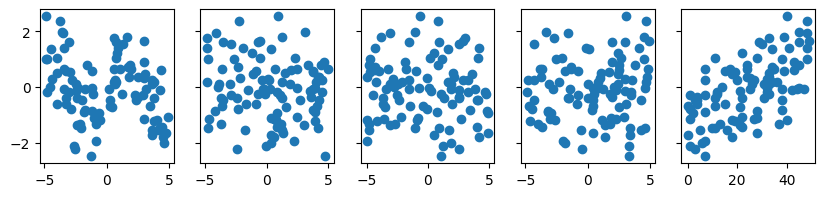

In [2]:
# Make some noisy data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
np.random.seed(1)
N = 100
# Have multiple covariates, where two are useful
num_covariates = 5
num_ids = 50
X = np.random.uniform(low=-5, high=5, size=(N, num_covariates-1)).reshape(-1, num_covariates-1)
X = np.hstack((X, np.random.choice(a=np.arange(num_ids), size=(N, 1)).astype(int)))
Y = (
    np.sin(X[:, 0]) 
    + ((2/num_ids)*X[:, num_covariates-1]-1) 
    + np.random.uniform(low=-1, high=1, size=N)
).reshape(-1, 1)

print(np.round(X[:5, :], 1))

figs, axs = plt.subplots(1, num_covariates, figsize=(10,2), sharey=True)
for i in range(num_covariates):
    axs[i].scatter(X[:, i], Y)
plt.show()

## Stepwise Approach

In [3]:
# Now load search object and run search
gps = model_search.GPSearch(
    X=pd.DataFrame(X, columns=["X"+str(i) for i in range(num_covariates)]),
    Y=pd.DataFrame(Y, columns=["Y"]),
    unit_col="X"+str(num_covariates-1),
    categorical_vars=["X"+str(num_covariates-1)]
)

gps.run_search(random_seed=1)

Kernel search:   0%|          | 0/1 [03:25<?, ?it/s]


In [4]:
# Check to make sure it selects the X0 model
gps.models["Y"]["models"]

{'categorical[4]+squared_exponential[0]': {'kernel': <gpflow.kernels.base.Sum object at 0x364e348d0>
╒═════════════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤══════════╕
│ name                        │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │    value │
╞═════════════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪══════════╡
│ Sum.kernels[0].variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │ 0.286431 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ Sum.kernels[1].variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │ 0.483478 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ Sum.kernels[1].lengthscales │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │ 0.3019

(<Figure size 2000x500 with 3 Axes>,
 array([[<Axes: title={'center': 'categorical[X4](38.2%)'}, xlabel='X0'>,
         <Axes: title={'center': 'squared_exponential[X0](43.1%)'}, xlabel='X0'>,
         <Axes: title={'center': 'residuals (18.7%)'}, xlabel='X0'>,
         <Axes: >]], dtype=object))

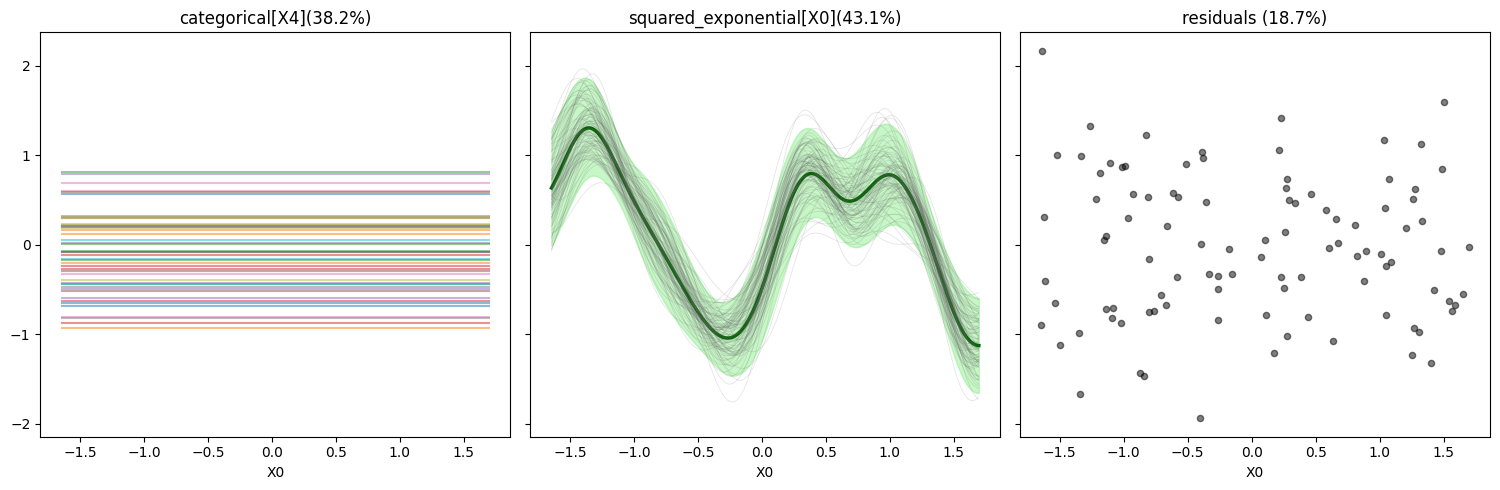

In [5]:
gps.plot_parts(
    out_label="Y",
    x_axis_label="X0"
)

## Regularization Approach

In [6]:
gps_reg = model_search.GPSearch(
    X=pd.DataFrame(X, columns=["X"+str(i) for i in range(num_covariates)]),
    Y=pd.DataFrame(Y, columns=["Y"]),
    unit_col="X"+str(num_covariates-1),
    categorical_vars=["X"+str(num_covariates-1)]
)

gps_reg.run_penalized_search(
    random_seed=1
)

GPSearch: 100%|██████████| 15/15 [00:29<00:00,  1.96s/it]


In [7]:
gps_reg.models["Y"]

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,(),float64,-0.07648713772557607
PSVGP.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.2573014858942229
PSVGP.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,0.2766990852912844
PSVGP.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.6744606355437346
PSVGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.2960225675493242
PSVGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 5)",float64,"[[-2.63185406e-01, 6.68667791e-01, -1.53657000e+00..."
PSVGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[-1.72494...
PSVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[3.77254752e-01, 0.00000000e+00, 0.00000000e+00..."


In [8]:
print(f"Penalization factor selected: {gps_reg.models['Y'].penalization_factor}")

Penalization factor selected: 0.1


(<Figure size 2000x500 with 3 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[X0](18.0%)'}, xlabel='X0'>,
         <Axes: title={'center': 'categorical[X4](59.0%)'}, xlabel='X0'>,
         <Axes: title={'center': 'residuals (23.0%)'}, xlabel='X0'>,
         <Axes: >]], dtype=object))

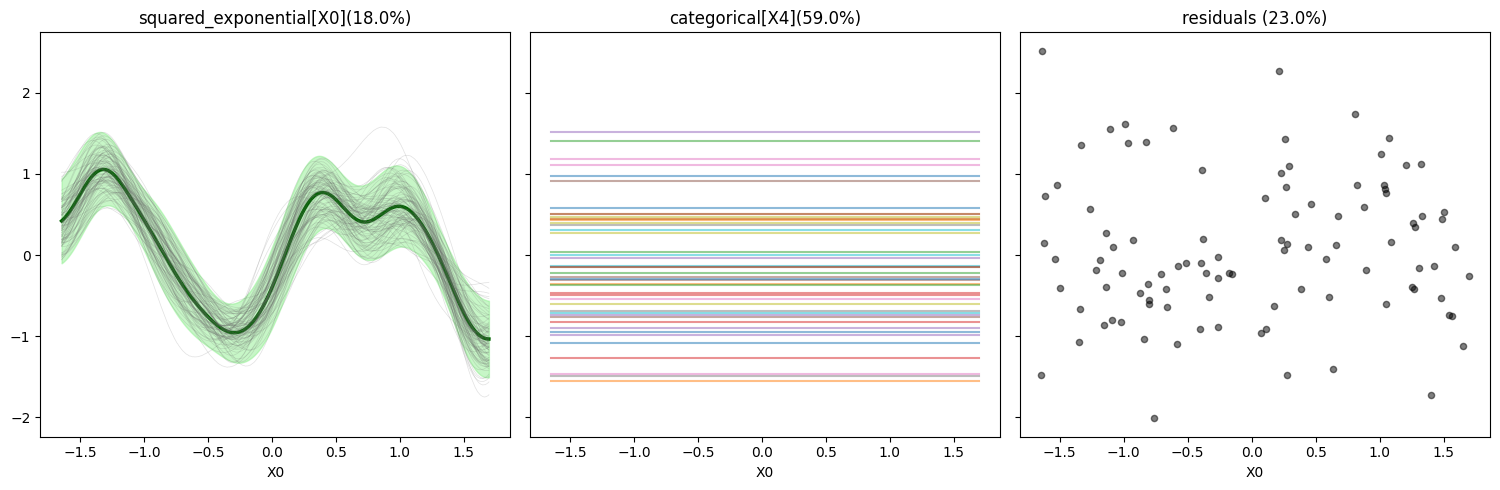

In [9]:
gps_reg.plot_parts(out_label="Y", x_axis_label="X0")

## Full search path

In [10]:
# Loop through penalization factors and record variances
from waveome import model_classes

full_kernel, full_kernel_name = regularization.full_kernel_build(
    cat_vars=[num_covariates-1],
    num_vars=list(np.arange(num_covariates-1)),
    var_names=["X"+str(i) for i in range(num_covariates)],
    return_sum=True,
    kerns=[gpflow.kernels.SquaredExponential()]
)
print(f"Kernel structure: {'+'.join(full_kernel_name)}")

param_list = []
val_list = []
factor_list = []
for f in np.concatenate((np.zeros(1), np.exp(np.linspace(-1, 5, 20)))):
    print(f'Starting penalization factor {f}')
    reg_gp = model_classes.PSVGP(
        X=X,
        Y=Y,
        kernel=gpflow.utilities.deepcopy(full_kernel),
        penalized_options={'penalization_factor': f}
    )

    reg_gp.optimize_params()
    for param, val in gpflow.utilities.parameter_dict(reg_gp).items():
        if 'variance' in param:
            param_list.append(param)
            val_list.append(val.numpy())
            factor_list.append(reg_gp.penalization_factor)

# Save output
pen_df = pd.DataFrame({
    'parameter': param_list,
    'value': val_list,
    'penalization': factor_list
})
pen_df

Kernel structure: categorical[X4]+squared_exponential[X0]+squared_exponential[X1]+squared_exponential[X2]+squared_exponential[X3]+categorical[X0]*squared_exponential[X1]+categorical[X0]*squared_exponential[X2]+categorical[X0]*squared_exponential[X3]+categorical[X0]*squared_exponential[X4]
Starting penalization factor 0.0
Starting penalization factor 0.36787944117144233
Starting penalization factor 0.5044883526787212
Starting penalization factor 0.6918258252705171
Starting penalization factor 0.9487294800164371
Starting penalization factor 1.3010321288603353
Starting penalization factor 1.7841593794445278
Starting penalization factor 2.446691838462353
Starting penalization factor 3.3552501090244724
Starting penalization factor 4.601193790380954
Starting penalization factor 6.309808094394382
Starting penalization factor 8.652901834153894
Starting penalization factor 11.8660835688522
Starting penalization factor 16.272453098591342
Starting penalization factor 22.31509059492222
Starting pe

,parameter,value,penalization
0,.kernel.kernels[0].variance,0.0008253950140770667,0.000000
1,.kernel.kernels[1].variance,0.9734806954719648,0.000000
2,.kernel.kernels[2].variance,0.0070722914803506955,0.000000
3,.kernel.kernels[3].variance,0.05232900147088236,0.000000
4,.kernel.kernels[4].variance,3.848243519150975e-06,0.000000
...,...,...,...
289,.kernel.kernels[7].kernels[0].variance,1.6928004274979157e-06,148.413159
290,.kernel.kernels[7].kernels[1].variance,1.6928004274979157e-06,148.413159
291,.kernel.kernels[8].kernels[0].variance,1.6905679865620787e-06,148.413159
292,.kernel.kernels[8].kernels[1].variance,1.6905679865620787e-06,148.413159


In [11]:
# Hardcode kernel parameter list for plotting
parameter_names = ['categorical[X4]',
 'squared_exponential[X0]',
 'squared_exponential[X1]',
 'squared_exponential[X2]',
 'squared_exponential[X3]',
 '(categorical[X0])*squared_exponential[X1]',
 'categorical[X0]*(squared_exponential[X1])',
 '(categorical[X0])*squared_exponential[X2]',
 'categorical[X0]*(squared_exponential[X2])',
 '(categorical[X0])*squared_exponential[X3]',
 'categorical[X0]*(squared_exponential[X3])',
 '(categorical[X0])*squared_exponential[X4]',
 'categorical[X0]*(squared_exponential[X4])',
 'likelihood']

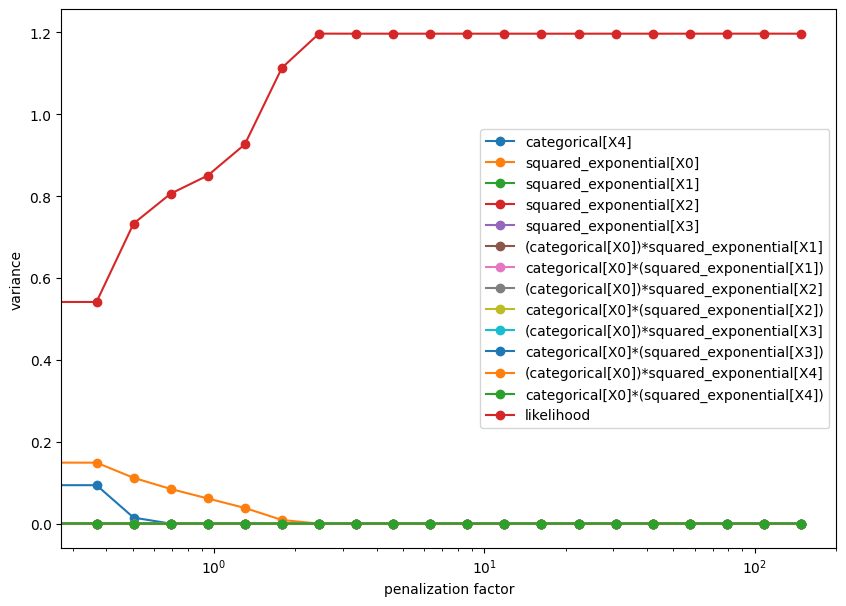

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7))
for i, v in enumerate(pen_df.parameter.unique()):
    axs.plot(
        pen_df.loc[pen_df.parameter == v, 'penalization'],
        pen_df.loc[pen_df.parameter == v, 'value'],
        '-o',
        label=parameter_names[i]
    )
plt.legend()
plt.xscale("log")
plt.xlabel("penalization factor")
plt.ylabel("variance")
plt.show()